In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, shape
import geopandas as gpd
import pickle

# Import custom functions from `scripts` folder
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts.clean_tweets import geometrize_tweets, convert_shapefile_crs, find_frequencies
from scripts.home_location import assign_home_location

np.random.seed(42)
pd.set_option('display.max_columns', 999)

# Loading + cleaning data

In [4]:
# # Load data (~7m for all four, 14s for ba12, 3m for ba14)
# ba12 = pd.read_csv('../data/tweets/ba_2012.csv')
# ba13 = pd.read_csv('../data/tweets/ba_2013.csv')
ba14 = pd.read_csv('../data/tweets/ba_2014.csv')
# ba15 = pd.read_csv('../data/tweets/ba_2015.csv')

In [5]:
# # Save number of tweets, users, median tweets/user for future analysis
# num_tweets_12, num_users_12, median_tweets_12 = len(ba12), ba12['u_id'].nunique(), ba12.groupby('u_id').size().median()
# num_tweets_13, num_users_13, median_tweets_13 = len(ba13), ba13['u_id'].nunique(), ba13.groupby('u_id').size().median()
num_tweets_14, num_users_14, median_tweets_14 = len(ba14), ba14['u_id'].nunique(), ba14.groupby('u_id').size().median()
# num_tweets_15, num_users_15, median_tweets_15 = len(ba15), ba15['u_id'].nunique(), ba15.groupby('u_id').size().median()

In [22]:
# # Summary output
# for year in [12, 13, 14, 15]:
#     print('Year: 20' + str(year))
#     print('----------')
    
#     print('Total number of tweets:', eval('num_tweets_' + str(year)))
#     print('Number of unique users:', eval('num_users_' + str(year)))
#     print('Median number of tweets per user:', eval('median_tweets_' + str(year)))
    
#     print()

Year: 2012
----------
Total number of tweets: 3487867
Number of unique users: 79364
Median number of tweets per user: 8.0

Year: 2013
----------
Total number of tweets: 18279276
Number of unique users: 247877
Median number of tweets per user: 10.0

Year: 2014
----------
Total number of tweets: 44234591
Number of unique users: 365174
Median number of tweets per user: 11.0

Year: 2015
----------
Total number of tweets: 18962977
Number of unique users: 333464
Median number of tweets per user: 6.0



In [15]:
# Median across all four years
cumulative_tweet_numbers = pd.concat([
    ba12.groupby('u_id').size(),
    ba13.groupby('u_id').size(),
    ba14.groupby('u_id').size(),
    ba15.groupby('u_id').size()
])
cumulative_tweet_numbers.median()

8.0

In [6]:
# # Filter out tweets below the median number of tweets for that year (~7m for all four, 3m for ba14)
# ba12_filtered = ba12.groupby('u_id').filter(lambda group: len(group) >= median_tweets_12)
# ba13_filtered = ba13.groupby('u_id').filter(lambda group: len(group) > median_tweets_13)
ba14_filtered = ba14.groupby('u_id').filter(lambda group: len(group) > median_tweets_14)
# ba15_filtered = ba15.groupby('u_id').filter(lambda group: len(group) > median_tweets_15)

In [11]:
# for year in [12, 13, 14, 15]:
#     print(f'Number of selected users in 20{str(year)} (after dropping):', 
#           eval('ba' + str(year) + '_filtered["u_id"].nunique()'), '/', 
#           eval('num_users_' + str(year)))

Number of selected users in 2012 (after dropping): 40473 / 79364
Number of selected users in 2013 (after dropping): 121002 / 247877
Number of selected users in 2014 (after dropping): 179545 / 365174
Number of selected users in 2015 (after dropping): 158701 / 333464


In [ ]:
# # Add tweet geometries (~13m for all four, )
# ba12_filtered = geometrize_tweets(ba12_filtered)
# ba13_filtered = geometrize_tweets(ba13_filtered)
ba14_filtered = geometrize_tweets(ba14_filtered)
# ba15_filtered = geometrize_tweets(ba15_filtered)

In [10]:
# # Spatial join with tracts (~1h2m for ba12 and ba13 )
ba_shapefiles = gpd.read_file('../data/shapefiles/buenos_aires_shapefiles/radio_barrio_census_2010.shp')
ba_shapefiles = convert_shapefile_crs(ba_shapefiles)

# ba12_filtered = gpd.sjoin(ba12_filtered, ba_shapefiles, how='left', op='intersects')
# ba13_filtered = gpd.sjoin(ba13_filtered, ba_shapefiles, how='left', op='intersects')
# ba14_filtered = gpd.sjoin(ba14_filtered, ba_shapefiles, how='left', op='intersects')
# ba15_filtered = gpd.sjoin(ba15_filtered, ba_shapefiles, how='left', op='intersects')

In [ ]:
# # Add datetime
# ba12_filtered['timestamp'] = pd.to_datetime(ba12_filtered['created_at'] // 1000, unit='s')
# ba13_filtered['timestamp'] = pd.to_datetime(ba13_filtered['created_at'] // 1000, unit='s')
ba14_filtered['timestamp'] = pd.to_datetime(ba14_filtered['created_at'] // 1000, unit='s')
# ba15_filtered['timestamp'] = pd.to_datetime(ba15_filtered['created_at'] // 1000, unit='s')

# ba12_filtered['date'] = ba12_filtered['timestamp'].dt.date
# ba12_filtered['hour'] = ba12_filtered['timestamp'].dt.hour
# ba13_filtered['date'] = ba13_filtered['timestamp'].dt.date
# ba13_filtered['hour'] = ba13_filtered['timestamp'].dt.hour
ba14_filtered['date'] = ba14_filtered['timestamp'].dt.date
ba14_filtered['hour'] = ba14_filtered['timestamp'].dt.hour
# ba15_filtered['date'] = ba15_filtered['timestamp'].dt.date
# ba15_filtered['hour'] = ba15_filtered['timestamp'].dt.hour

In [ ]:
# # Assign home locations (~7m for ba12 and ba13)
# ba12_filtered['home'] = assign_home_location(ba12_filtered, tract='BARRIOS')
# ba13_filtered['home'] = assign_home_location(ba13_filtered, tract='BARRIOS')
ba14_filtered['home'] = assign_home_location(ba14_filtered, tract='BARRIOS')
# ba15_filtered['home'] = assign_home_location(ba15_filtered)

In [ ]:
# # 13m
# with open('../data/ba12_home.pkl', 'wb') as file:
#     pickle.dump(ba12_filtered, file, protocol=4)
# with open('../data/ba13_home.pkl', 'wb') as file:
#     pickle.dump(ba13_filtered, file, protocol=4)
with open('../data/ba14_home.pkl', 'wb') as file:
    pickle.dump(ba14_filtered, file, protocol=4)

# 4m to load ba12
# with open('../data/ba12_home.pkl', 'rb') as file:
#     ba12_filtered = pickle.load(file)
# with open('../data/ba13_home.pkl', 'rb') as file:
#     ba13_filtered = pickle.load(file)

In [38]:
# Ratio of home assignments in 2012
print((~ba12_filtered['home'].isnull()).mean())

0.29746779056713285


In [37]:
# Ratio of home assignments in 2013
print((~ba13_filtered['home'].isnull()).mean())

0.30699044633132305


# 2013

In [16]:
# Ratio of filtered 2013 tweets in which tweet was made from home tract 
(ba13_filtered['home'] == ba13_filtered['BARRIOS']).mean()

0.19428220981914557

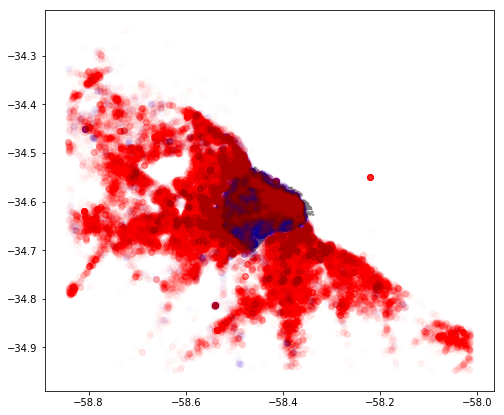

In [14]:
### Plot 1% of 2013 tweets (1m30s)
# Blue tweets: Has a home location
# Red tweets: Does not have a home location
# Gray (barely visible beneath the blue): Buenos Aires shapefile
fig, ax = plt.subplots(figsize=(10, 7))
ba_shapefiles['geometry'].plot(ax=ax, color='gray')
ba13_filtered[~ba13_filtered['home'].isnull()].sample(frac=0.01).plot(ax=ax, marker='o', color='blue', alpha=0.01)
ba13_filtered[ba13_filtered['home'].isnull()].sample(frac=0.01).plot(ax=ax, marker='o', color='red', alpha=0.01);

# 2014